In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv('data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df = df[(df['BMI'] != 0) & (df['SkinThickness'] != 0)]
df = df.reset_index(drop=True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
534,9,170,74,31,0,44.0,0.403,43,1
535,10,101,76,48,180,32.9,0.171,63,0
536,2,122,70,27,0,36.8,0.340,27,0
537,5,121,72,23,112,26.2,0.245,30,0


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

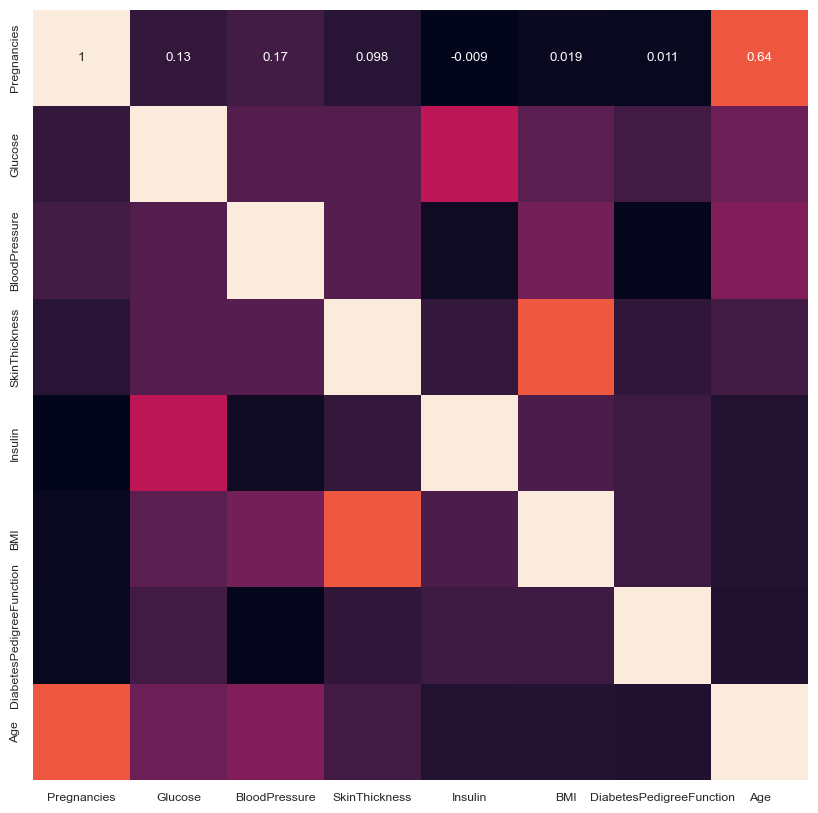

In [6]:
df_corr = (df.drop('Outcome', axis=1)).corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
534,9,170,74,31,0,44.0,0.403,43,1
535,10,101,76,48,180,32.9,0.171,63,0
536,2,122,70,27,0,36.8,0.340,27,0
537,5,121,72,23,112,26.2,0.245,30,0


In [8]:
df = df.drop('Outcome', axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,3,78,50,32,88,31.0,0.248,26
...,...,...,...,...,...,...,...,...
534,9,170,74,31,0,44.0,0.403,43
535,10,101,76,48,180,32.9,0.171,63
536,2,122,70,27,0,36.8,0.340,27
537,5,121,72,23,112,26.2,0.245,30


In [9]:
X = df.drop('BMI', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,1,89,66,23,94,0.167,21
3,0,137,40,35,168,2.288,33
4,3,78,50,32,88,0.248,26
...,...,...,...,...,...,...,...
534,9,170,74,31,0,0.403,43
535,10,101,76,48,180,0.171,63
536,2,122,70,27,0,0.340,27
537,5,121,72,23,112,0.245,30


In [10]:
y = df['BMI']
y.value_counts()

BMI
32.0    11
31.6     9
33.6     8
33.3     7
29.7     7
        ..
36.7     1
28.8     1
41.8     1
42.6     1
44.0     1
Name: count, Length: 223, dtype: int64

In [11]:
y = y.values
X = X.values

In [12]:
RANDOM_SEED = 42

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

### 모델 정의하기

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(8, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(x=X_train, y=y_train,
                    epochs=30,
                    batch_size=16,
                    validation_data=(X_test, y_test))

y_pred = model.predict(X_test)

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 211.2161 - mse: 211.2161 - val_loss: 79.0871 - val_mse: 79.0871
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.6393 - mse: 47.6393 - val_loss: 70.3647 - val_mse: 70.3647
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.9716 - mse: 43.9716 - val_loss: 57.1653 - val_mse: 57.1653
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.0265 - mse: 40.0265 - val_loss: 55.2900 - val_mse: 55.2900
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.7409 - mse: 38.7409 - val_loss: 54.6123 - val_mse: 54.6123
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.7026 - mse: 32.7026 - val_loss: 57.0346 - val_mse: 57.0346
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.3131 - mse: 37.3131 - val_loss: 47.3488 - val_mse: 47.3488
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.6543 - mse: 32.6543 - val_loss: 43.6563 - val_mse: 43.6563
Epoch 9/30
27/27 ━━━━━━━━━━━━━━━━━━━━

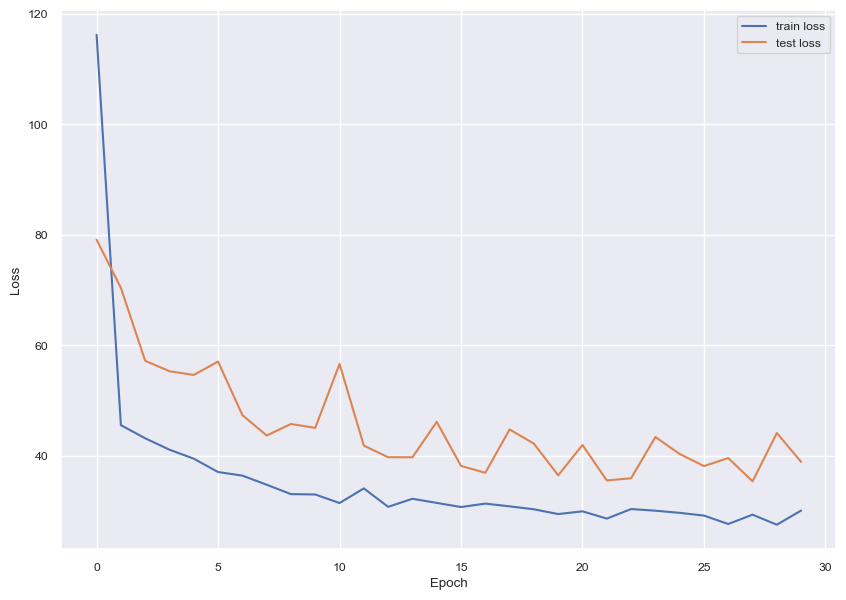

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(range(30), history.history['loss'], label='train loss')
plt.plot(range(30), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.9690 - mse: 36.9690 


[38.88172149658203, 38.88172149658203]

In [18]:
from sklearn.metrics import mean_squared_error

print('mse', mean_squared_error(y_pred, y_test))

mse 38.88172136476602


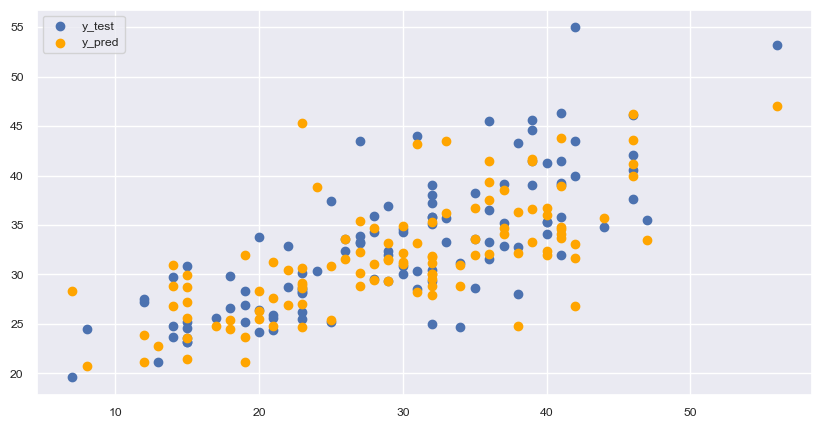

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(X_test[:,3], y_test, label='y_test')
plt.scatter(X_test[:,3], y_pred, c='orange', label='y_pred')
plt.legend()
plt.show()